In [1]:
cd ..

/userdata/jgauthier/projects/ideal-word-representations


In [2]:
from pathlib import Path

import pandas as pd
import seaborn as sns

from transformers import TrainerState

from src.models import get_best_checkpoint

In [3]:
all_model_dirs = Path("outputs/models").glob("*/*")
checkpoints = [Path(get_best_checkpoint(d)) for d in all_model_dirs if not d.stem.startswith(".")]

In [4]:
trainer_states = [TrainerState.load_from_json(c / "trainer_state.json") for c in checkpoints]

In [5]:
log_df = pd.concat([pd.DataFrame(trainer_state.log_history) for trainer_state in trainer_states],
                   keys=[c.parent for c in checkpoints], names=["checkpoint"])
log_df

epoch  learning_rate  \
checkpoint                                                                     
/userdata/jgauthier/projects/ideal-word-represe... 0     0.00       0.001000   
                                                   1     0.01       0.000997   
                                                   2     0.01       0.000995   
                                                   3     0.02       0.000992   
                                                   4     0.02       0.000989   
...                                                       ...            ...   
/userdata/jgauthier/projects/ideal-word-represe... 348   1.70       0.000148   
                                                   349   1.71       0.000145   
                                                   350   1.72       0.000142   
                                                   351   1.72       0.000140   
                                                   352   1.72            NaN   

                                                          loss    step  \
checkpoint                                                               
/userdata/jgauthier/projects/ideal-word-represe... 0    2.9466     1.0   
                                                   1    0.8889    10.0   
                                                   2   -2.9130    20.0   
                                                   3   -4.0220    30.0   
                                                   4   -4.7529    40.0   
...                                                        ...     ...   
/userdata/jgauthier/projects/ideal-word-represe... 348 -9.7159  3170.0   
                                                   349 -9.9988  3180.0   
                                                   350 -9.5712  3190.0   
                                                   351 -9.5359  3200.0   
                                                   352     NaN  3200.0   

                                                        eval_loss  \
checkpoint                                                          
/userdata/jgauthier/projects/ideal-word-represe... 0          NaN   
                                                   1          NaN   
                                                   2          NaN   
                                                   3          NaN   
                                                   4          NaN   
...                                                           ...   
/userdata/jgauthier/projects/ideal-word-represe... 348        NaN   
                                                   349        NaN   
                                                   350        NaN   
                                                   351        NaN   
                                                   352  -9.592309   

                                                        eval_runtime  \
checkpoint                                                             
/userdata/jgauthier/projects/ideal-word-represe... 0             NaN   
                                                   1             NaN   
                                                   2             NaN   
                                                   3             NaN   
                                                   4             NaN   
...                                                              ...   
/userdata/jgauthier/projects/ideal-word-represe... 348           NaN   
                                                   349           NaN   
                                                   350           NaN   
                                                   351           NaN   
                                                   352       27.8168   

                                                        eval_samples_per_second  \
checkpoint                                                                        
/userdata/jgauthier/projects/ideal-word-represe... 

In [6]:
log_df_long = log_df.reset_index().melt(id_vars=["checkpoint", "step"], value_vars=["loss", "eval_loss"])
log_df_long

,checkpoint,step,variable,value
0,/userdata/jgauthier/projects/ideal-word-repres...,1.0,loss,2.946600
1,/userdata/jgauthier/projects/ideal-word-repres...,10.0,loss,0.888900
2,/userdata/jgauthier/projects/ideal-word-repres...,20.0,loss,-2.913000
3,/userdata/jgauthier/projects/ideal-word-repres...,30.0,loss,-4.022000
4,/userdata/jgauthier/projects/ideal-word-repres...,40.0,loss,-4.752900
...,...,...,...,...
6023,/userdata/jgauthier/projects/ideal-word-repres...,3170.0,eval_loss,NaN
6024,/userdata/jgauthier/projects/ideal-word-repres...,3180.0,eval_loss,NaN
6025,/userdata/jgauthier/projects/ideal-word-repres...,3190.0,eval_loss,NaN
6026,/userdata/jgauthier/projects/ideal-word-repres...,3200.0,eval_loss,NaN


In [9]:
log_df_long[log_df_long.variable == "eval_loss"].groupby("checkpoint").value.min().sort_values()

checkpoint
/userdata/jgauthier/projects/ideal-word-representations/outputs/models/w2v2_6_32/phoneme_within_word_prefix   -9.618377
/userdata/jgauthier/projects/ideal-word-representations/outputs/models/w2v2_6_8/phoneme_within_word_prefix    -9.592309
/userdata/jgauthier/projects/ideal-word-representations/outputs/models/w2v2_6_8/word                          -9.334038
/userdata/jgauthier/projects/ideal-word-representations/outputs/models/w2v2_6_8/biphone_recon                 -9.180657
/userdata/jgauthier/projects/ideal-word-representations/outputs/models/w2v2_6_32/phoneme_within_word_suffix   -8.782502
/userdata/jgauthier/projects/ideal-word-representations/outputs/models/w2v2_6_8/next_phoneme                  -8.508929
outputs/models/w2v2_6_8/phoneme                                                                               -8.488789
/userdata/jgauthier/projects/ideal-word-representations/outputs/models/w2v2_6_8/syllable                      -8.487025
/userdata/jgauthier/projects/

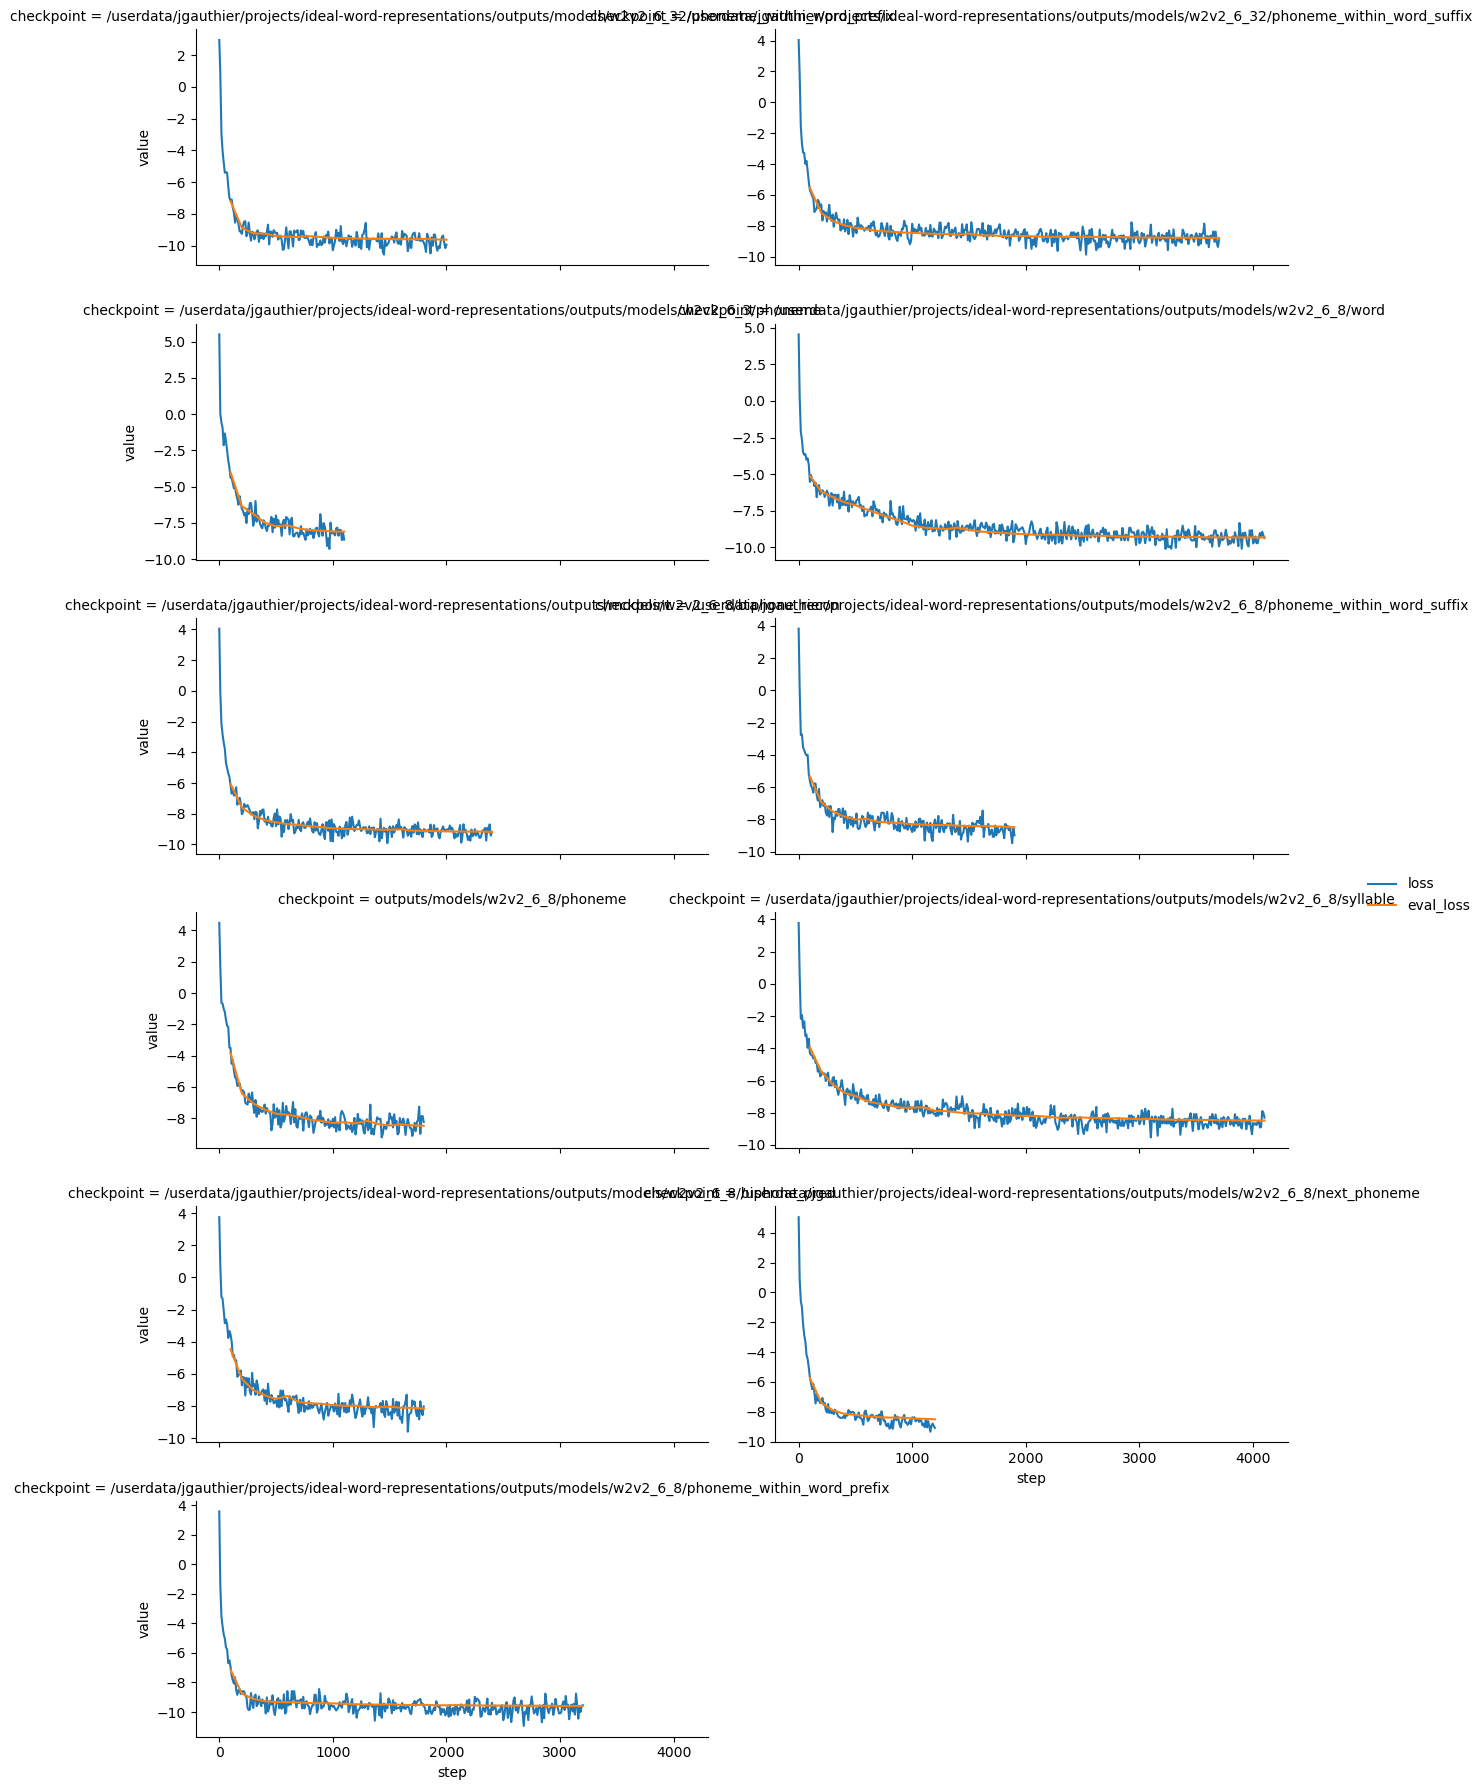

In [7]:
# Plot training and validation loss for all models
g = sns.FacetGrid(log_df_long, col="checkpoint", col_wrap=2, aspect=2, sharey=False)
g.map(sns.lineplot, "step", "value", "variable")
g.add_legend()